<a href="https://colab.research.google.com/github/rubeshajith/Classification-Project/blob/main/Copy_of_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not 

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [94]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data/project/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [ ]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Displaying first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Getting the shape of the dataset
df.shape

(2000, 21)

In [ ]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','m_dep':'mobile_depth','pc':'rear_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [ ]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   front_cam_pix  2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   mobile_depth   2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  rear_cam_pix   2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  screen_height  2000 non-null   int64  
 15  screen_width   2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Checking for null values
df.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam_pix    0
four_g           0
int_memory       0
mobile_depth     0
mobile_wt        0
n_cores          0
rear_cam_pix     0
px_height        0
px_width         0
ram              0
screen_height    0
screen_width     0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

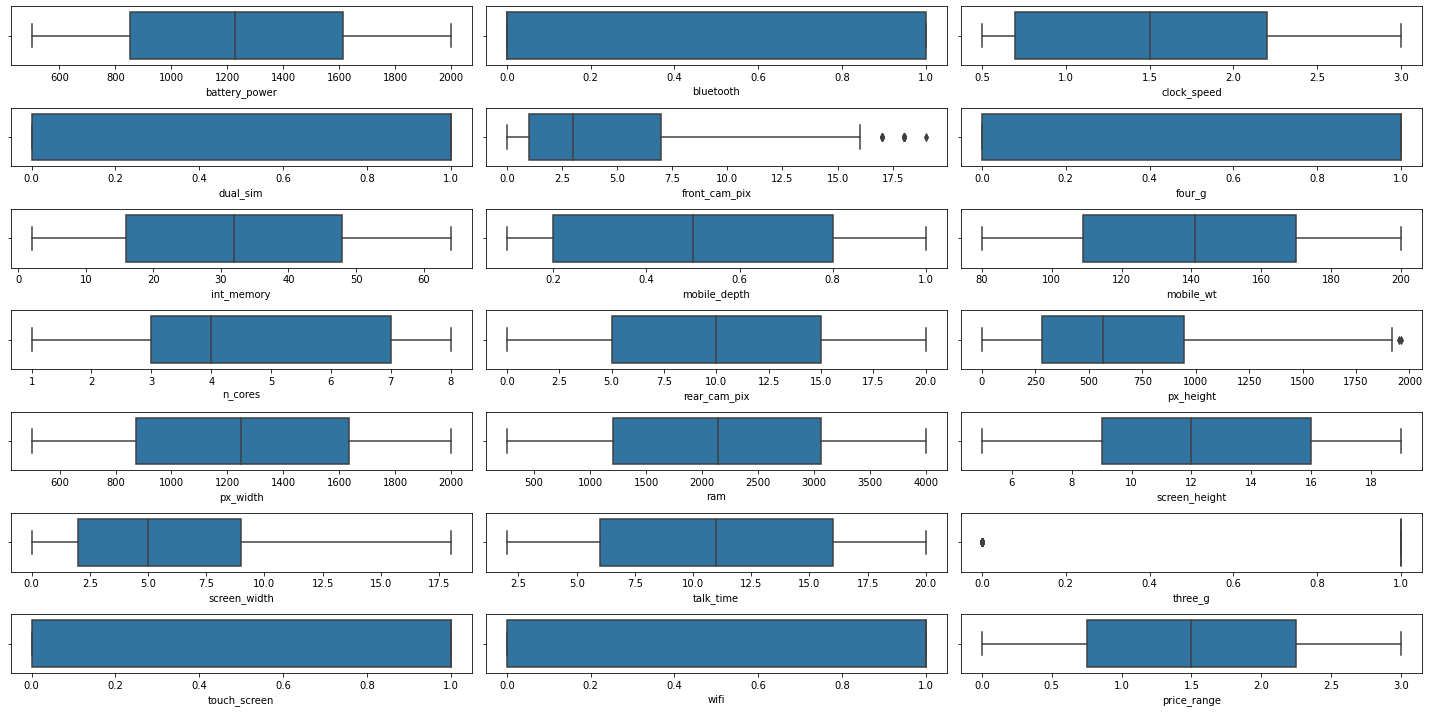

In [ ]:
plt.figure(figsize = (20, 10))
x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

In [ ]:
df.front_cam_pix.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_cam_pix, dtype: int64

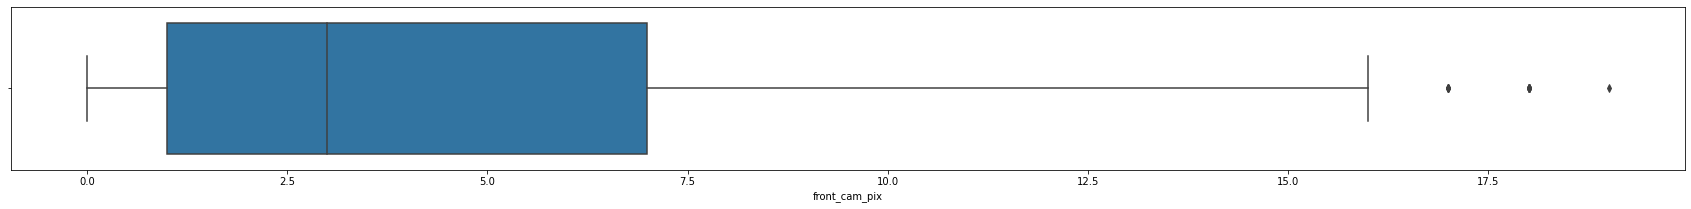

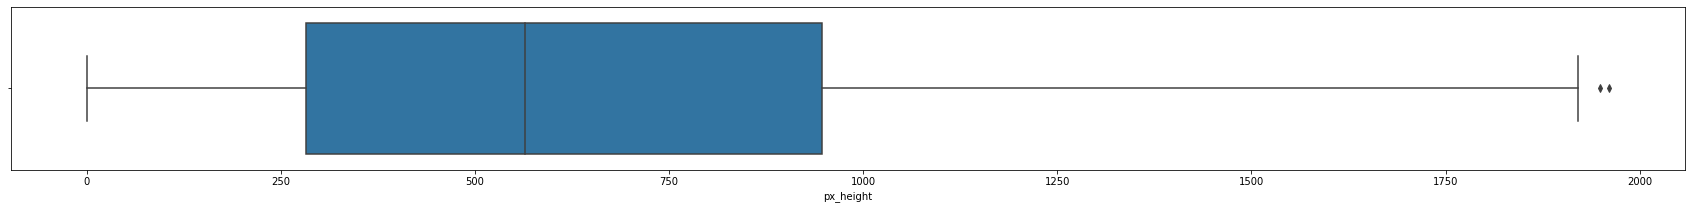

In [ ]:
# plotting seperate box_plots which detected outliers
plt.figure(figsize = (30,3))
sns.boxplot(df.front_cam_pix)
plt.figure(figsize = (30,3))
sns.boxplot(df.px_height)


In [ ]:
df.front_cam_pix.value_counts(ascending= True).loc[lambda x :x <= 11].to_frame()

,front_cam_pix
19,1
17,6
18,11


In [ ]:
df.px_height.sort_values(ascending= False)[:2].to_frame()

,px_height
1771,1960
988,1949


Above printed dataframes are the outliers which were detected by box_plot. i.e, Front camerea pixels with 19MP has count of one, 17MP has count of six and 18MP with eleven counts so total of 18 rows 

Pixel height have two outlier which were detected by boxplot 

So 20 outlier rows which is nearly 1% of data in our datset 

We're implementing Lostic Regression too and they follows similar assumptions of Linear Regression

Logistic Regression suffers of extreme outliers, We aren't removing this outliers, they are not extreme to do so.

In [ ]:
# Interpreting our DataFrame Statistically
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From the above describe method we can see variables with have 0 values which is unlikely for few columns namely pixel_height and screen_width.

In [ ]:
df[df.px_height == 0]

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


Since they are continous variables, and also similar pixel width doesn't have similar pixel height so we're replacing zero values to there means with respect to price classes

In [ ]:
pr_count_pxh = df.price_range[df['px_height'] == 0].value_counts().to_frame(name="Count_of_zeros").sort_index()
# pr_count_pxh.columns = ["price_range","count_of_zeros"]
pr_count_pxh.index.name = "price_range"
pr_count_pxh

,Count_of_zeros
price_range,
1,1
3,1


In [ ]:
price_ph_mean = np.ceil(df.groupby("price_range")["px_height"].mean())
price_ph_mean.to_frame(name="px_height_mean")

,px_height_mean
price_range,
0,537.0
1,667.0
2,633.0
3,745.0


In [ ]:
df["px_height"] = df["px_height"].replace(0, np.nan)

In [ ]:
df["px_height"] = df["px_height"].fillna(np.ceil(df.groupby("price_range")["px_height"].transform("mean")))

In [ ]:
pr_count_sw = df.price_range[df['screen_width'] == 0].value_counts().to_frame(name="Count_of_zeros").sort_index()
# pr_count_sw.columns = ["price_range","count_of_zeros"]
pr_count_sw.index.name = "price_range"
pr_count_sw

,Count_of_zeros
price_range,
0,49
1,48
2,44
3,39


In [ ]:
price_sw_mean = np.ceil(df.groupby("price_range")["screen_width"].mean())
price_sw_mean.to_frame(name="screen_width_mean")

,screen_width_mean
price_range,
0,6.0
1,6.0
2,6.0
3,7.0


In [ ]:
df["screen_width"] = df["screen_width"].replace(0, np.nan)

In [ ]:
df["screen_width"] = df["screen_width"].fillna(np.ceil(df.groupby("price_range")["screen_width"].transform("mean")))

In [ ]:
# 1 inch is equal to 2.54 cm :
df["screen_height"] = df["screen_height"]/2.54
df["screen_width"] = df["screen_width"]/2.54


In [ ]:
# converting cm to mm for mobile depth colmn
df["mobile_depth"] = df["mobile_depth"]*10


In [ ]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,5.017500,140.249000,4.520500,9.916500,645.816000,1251.515500,2124.213000,4.845079,2.518504,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,2.884155,35.399655,2.287837,6.064315,443.317057,432.199447,1084.732044,1.658758,1.561124,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,1.000000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,1.968504,0.393701,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,2.000000,109.000000,3.000000,5.000000,284.000000,874.750000,1207.500000,3.543307,1.181102,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,5.000000,141.000000,4.000000,10.000000,568.000000,1247.000000,2146.500000,4.724409,2.362205,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,8.000000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,6.299213,3.543307,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,10.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,7.480315,7.086614,20.000000,1.000000,1.000000,1.000000,3.000000


### Feature Extraction

In [ ]:
# front cam
df.loc[df["front_cam_pix"] ==0, "has_front_cam"] = 0
df.loc[df["front_cam_pix"] >0, "has_front_cam"] = 1
df["has_front_cam"] = df["has_front_cam"].astype(int)

In [ ]:
# rear cam craetion
df.loc[df["rear_cam_pix"] ==0, "has_rear_cam"] = 0
df.loc[df["rear_cam_pix"] >0, "has_rear_cam"] = 1


Mobiles without rear camera doesn't have front cameras too, So we're not creating column which contains both camera.

In [ ]:
df['has_front_cam'].value_counts()

1    1526
0     474
Name: has_front_cam, dtype: int64

In [ ]:
df['has_rear_cam'].value_counts()

1.0    1899
0.0     101
Name: has_rear_cam, dtype: int64

In [ ]:
df.loc[(df['front_cam_pix'] ==0) & (df['rear_cam_pix'] ==0)].shape

(101, 23)

In [ ]:
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'hd_quality'] = 0
df['hd_quality'] = df['hd_quality'].fillna(1)

In [ ]:
df["hd_quality"].value_counts()

0.0    1437
1.0     563
Name: hd_quality, dtype: int64

In [ ]:
# screen size creation with pythagoras theorem (hypotenuse = np.sqrt(a^2+b^2) a,b is height and width)
df["screen_size"] = np.sqrt(df["screen_height"]**2 +df["screen_width"]**2).round(1)

In [ ]:
df["pixel_per_inch"] = ((np.sqrt(df["px_height"]**2 +df["px_width"]**2)) / df["screen_size"]).round(1)

In [ ]:
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df['ram_size'].value_counts()

2 to 3 GB        556
3 to 4 GB        524
1 to 2 GB        522
512 MB to 1GB    255
256 to 512 MB    142
Name: ram_size, dtype: int64

In [ ]:
ram_df = df["ram_size"].value_counts(ascending=True).to_frame(name="Counts")
ram_df.index.name = "approx_ramsize_in_gb"
ram_df

,Counts
approx_ramsize_in_gb,
256 to 512 MB,142
512 MB to 1GB,255
1 to 2 GB,522
3 to 4 GB,524
2 to 3 GB,556


In [ ]:
df["mobile_depth"].value_counts(bins=2)

(0.99, 5.5]    1105
(5.5, 10.0]     895
Name: mobile_depth, dtype: int64

In [ ]:
df.loc[(df['mobile_depth'] <= 7 ) & (df['mobile_wt'] < 155)& (df['touch_screen']== 1), 'slim_and_light_weight_touch_mob'] = 1
df['slim_and_light_weight_touch_mob'] = df['slim_and_light_weight_touch_mob'].fillna(0)

In [ ]:
df.slim_and_light_weight_touch_mob.value_counts().to_frame(name="counts")

,counts
0.0,1528
1.0,472


In [ ]:
df.clock_speed.value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [ ]:
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,has_front_cam,has_rear_cam,hd_quality,screen_size,pixel_per_inch,ram_size,slim_and_light_weight_touch_mob,speed
0,842,0,2.2,0,1,0,7,6.0,188,2,2,20.0,756,2549,3.543307,2.755906,19,0,0,1,1,1,1.0,0.0,4.5,168.1,2 to 3 GB,0.0,upto 2.5GHz
1,1021,1,0.5,1,0,1,53,7.0,136,3,6,905.0,1988,2631,6.692913,1.181102,7,1,1,0,2,0,1.0,1.0,6.8,321.2,2 to 3 GB,1.0,upto 1GHz
2,563,1,0.5,1,2,1,41,9.0,145,5,6,1263.0,1716,2603,4.330709,0.787402,9,1,1,0,2,1,1.0,1.0,4.4,484.2,2 to 3 GB,0.0,upto 1GHz
3,615,1,2.5,0,0,0,10,8.0,131,6,9,1216.0,1786,2769,6.299213,3.149606,11,1,0,0,2,0,1.0,1.0,7.0,308.7,2 to 3 GB,0.0,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,6.0,141,2,14,1208.0,1212,1411,3.149606,0.787402,15,1,1,0,1,1,1.0,0.0,3.2,534.8,1 to 2 GB,1.0,upto 1.5GHz


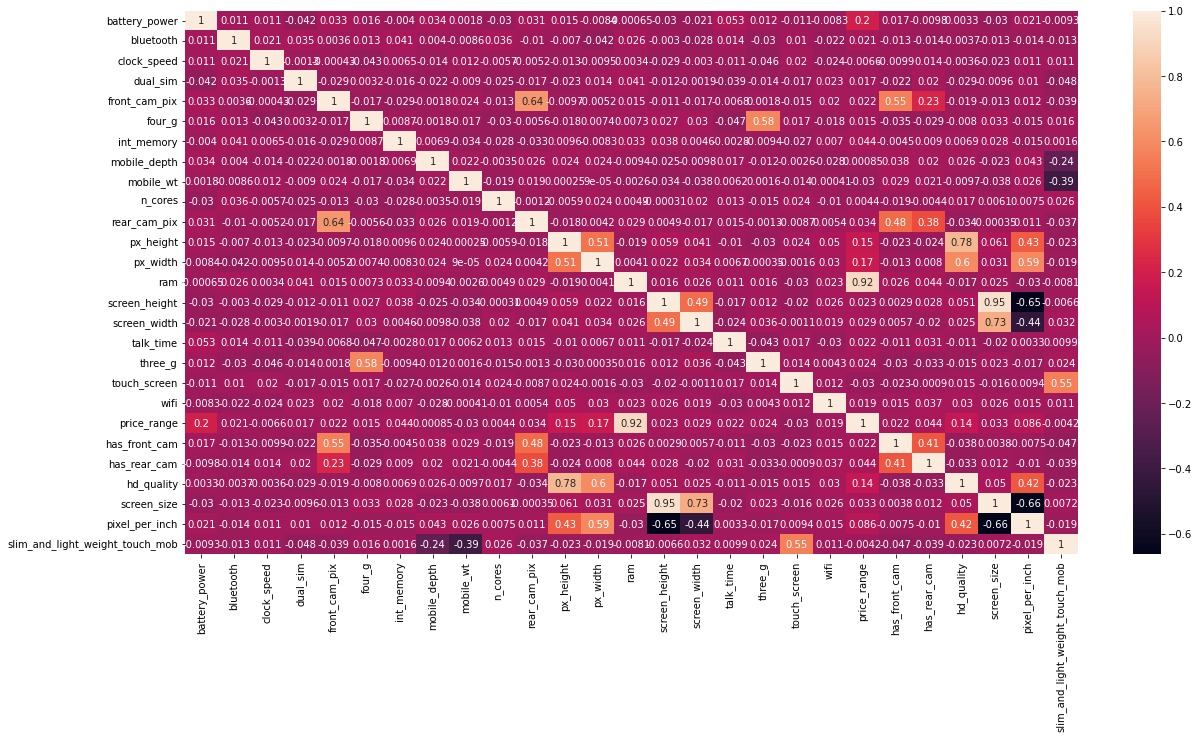

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [ ]:
sns.color_palette("crest", as_cmap=True)


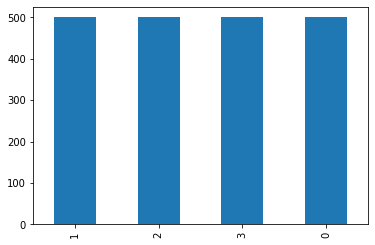

In [ ]:
df["price_range"].value_counts().plot(kind="bar")

In [ ]:
newly_created_binary_var = ["has_front_cam","has_rear_cam","hd_quality","slim_and_light_weight_touch_mob"]
for variable in newly_created_binary_var:
  df[variable] = df[variable].astype(int)

In [ ]:
binary_features = ["bluetooth","dual_sim","four_g","three_g","touch_screen","wifi","has_front_cam","has_rear_cam",
            "hd_quality","slim_and_light_weight_touch_mob"]                

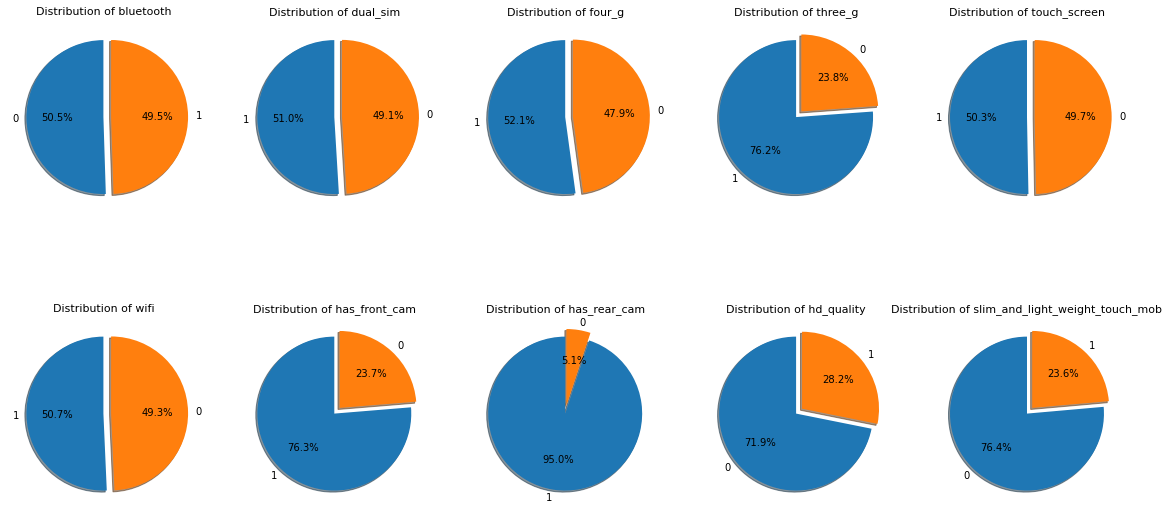

In [ ]:
plt.figure(figsize=(20,10))
count = 0

for feature in binary_features:
    myexplode = [0, 0.1]
    
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values  
    
    plt.subplot(2,5,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {binary_features[count]}', color = 'black',fontsize = 11)
    count += 1

In [ ]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,has_front_cam,has_rear_cam,hd_quality,screen_size,pixel_per_inch,ram_size,slim_and_light_weight_touch_mob,speed
0,842,0,2.2,0,1,0,7,6.0,188,2,2,20.0,756,2549,3.543307,2.755906,19,0,0,1,1,1,1,0,4.5,168.1,2 to 3 GB,0,upto 2.5GHz
1,1021,1,0.5,1,0,1,53,7.0,136,3,6,905.0,1988,2631,6.692913,1.181102,7,1,1,0,2,0,1,1,6.8,321.2,2 to 3 GB,1,upto 1GHz
2,563,1,0.5,1,2,1,41,9.0,145,5,6,1263.0,1716,2603,4.330709,0.787402,9,1,1,0,2,1,1,1,4.4,484.2,2 to 3 GB,0,upto 1GHz
3,615,1,2.5,0,0,0,10,8.0,131,6,9,1216.0,1786,2769,6.299213,3.149606,11,1,0,0,2,0,1,1,7.0,308.7,2 to 3 GB,0,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,6.0,141,2,14,1208.0,1212,1411,3.149606,0.787402,15,1,1,0,1,1,1,0,3.2,534.8,1 to 2 GB,1,upto 1.5GHz


In [ ]:
df.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

Text(0.5, 1.0, 'screen_size distribution')

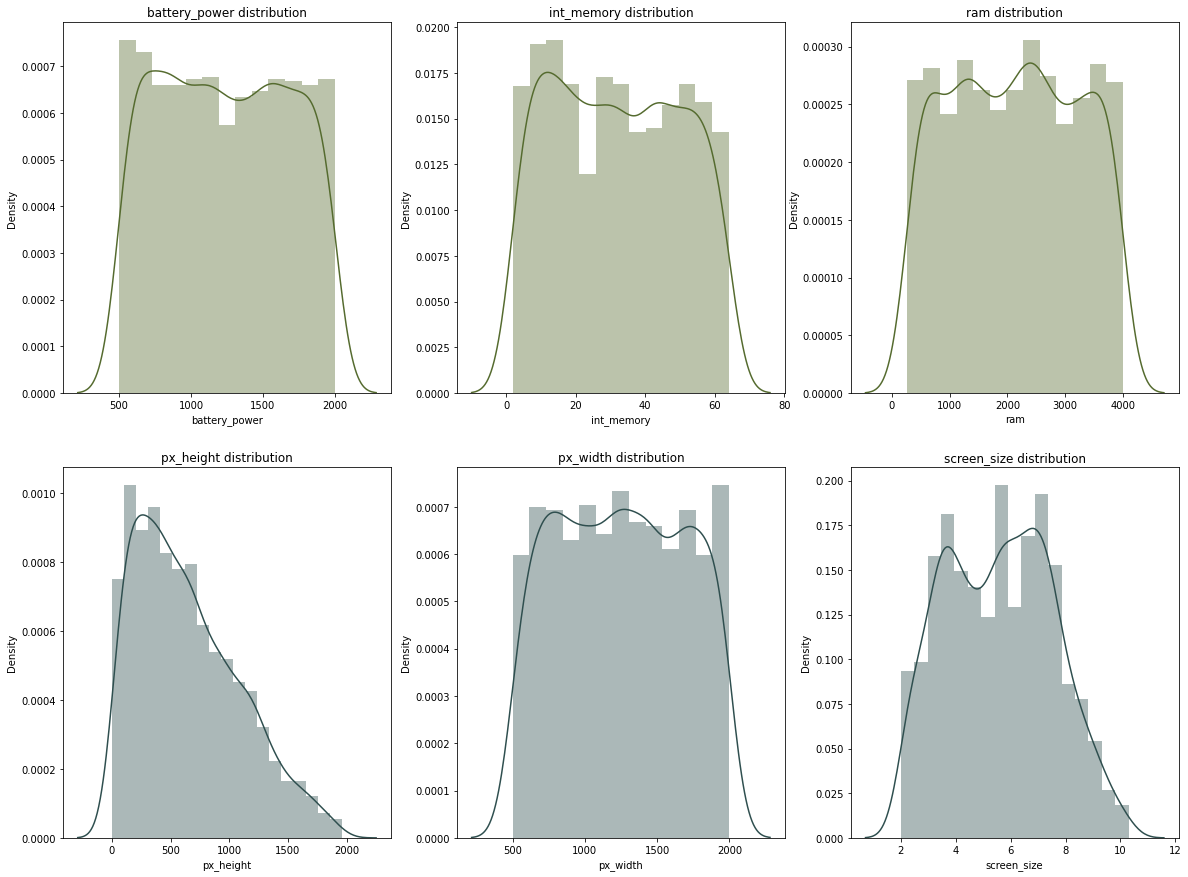

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.distplot(df['battery_power'], color="darkolivegreen").set_title('battery_power distribution')
plt.subplot(2,3,2)
sns.distplot(df['int_memory'], color="darkolivegreen").set_title('int_memory distribution')
plt.subplot(2,3,3)
sns.distplot(df['ram'], color="darkolivegreen").set_title('ram distribution')
plt.subplot(2,3,4)
sns.distplot(df['px_height'], color="darkslategrey").set_title('px_height distribution')
plt.subplot(2,3,5)
sns.distplot(df['px_width'], color="darkslategrey").set_title('px_width distribution')
plt.subplot(2,3,6)
sns.distplot(df['screen_size'], color="darkslategrey").set_title('screen_size distribution')

In [ ]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_cam_pix', 'four_g', 'int_memory', 'mobile_depth', 'mobile_wt',
       'n_cores', 'rear_cam_pix', 'px_height', 'px_width', 'ram',
       'screen_height', 'screen_width', 'talk_time', 'three_g', 'touch_screen',
       'wifi', 'price_range', 'has_front_cam', 'has_rear_cam', 'hd_quality',
       'screen_size', 'pixel_per_inch', 'ram_size',
       'slim_and_light_weight_touch_mob', 'speed'],
      dtype='object')

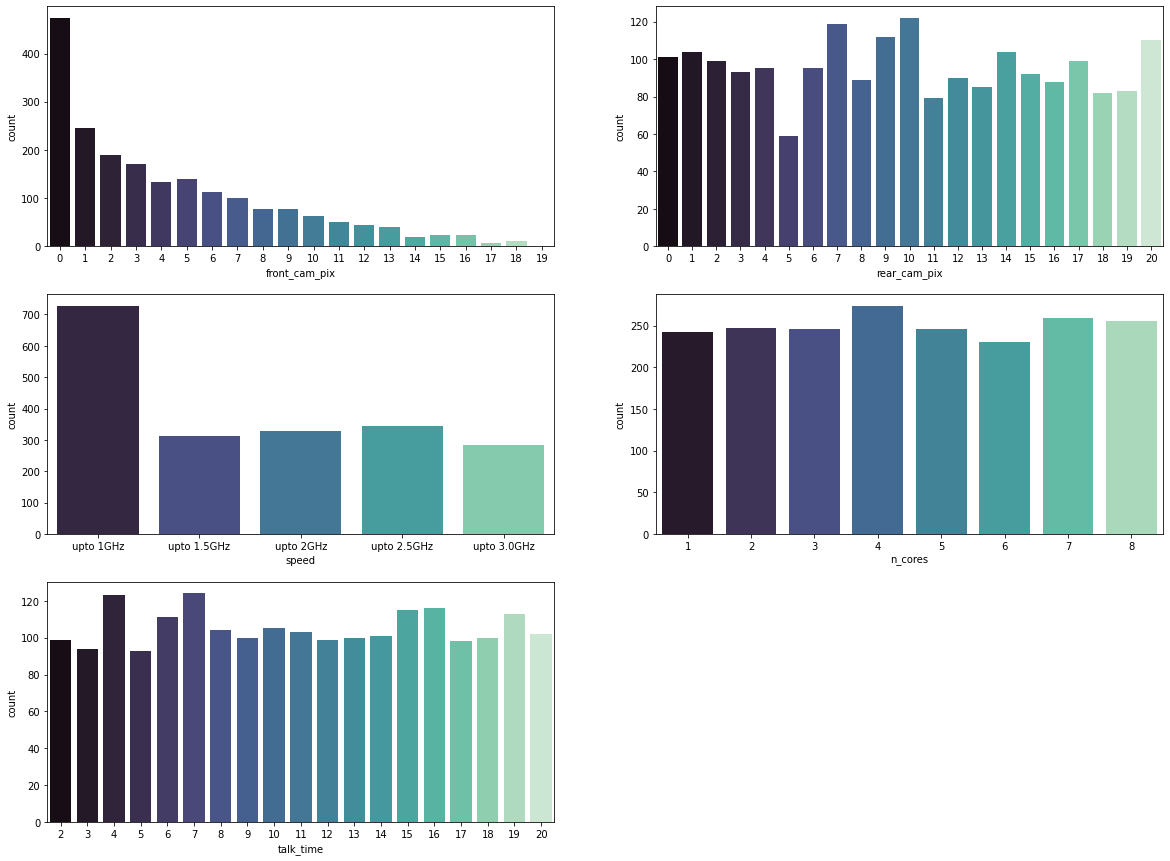

In [ ]:
distinct_features = ["front_cam_pix","rear_cam_pix","speed","n_cores","talk_time"]
plt.figure(figsize=(20,15))
count = 0
for feature in distinct_features:
  plt.subplot(3,2,count+1)
  sns.countplot(df[feature], palette = 'mako')
  count += 1

Bivariate Analysis

Text(0.5, 1.0, 'RAM distribution of price range 3')

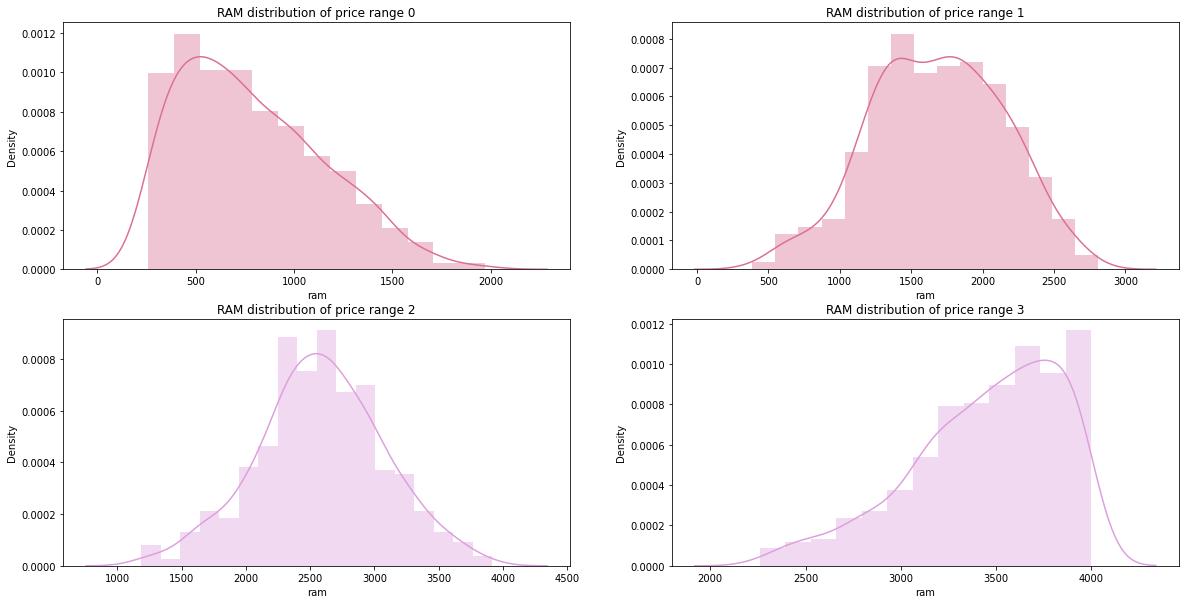

In [ ]:
df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

sns.set_palette("crest")

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'],color="palevioletred")
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'],color="palevioletred")
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'],color="plum")
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'],color="plum")
plt.title('RAM distribution of price range 3')

In [ ]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_pix,four_g,int_memory,mobile_depth,mobile_wt,n_cores,rear_cam_pix,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range,has_front_cam,has_rear_cam,hd_quality,screen_size,pixel_per_inch,ram_size,slim_and_light_weight_touch_mob,speed
0,842,0,2.2,0,1,0,7,6.0,188,2,2,20.0,756,2549,3.543307,2.755906,19,0,0,1,1,1,1,0,4.5,168.1,2 to 3 GB,0,upto 2.5GHz
1,1021,1,0.5,1,0,1,53,7.0,136,3,6,905.0,1988,2631,6.692913,1.181102,7,1,1,0,2,0,1,1,6.8,321.2,2 to 3 GB,1,upto 1GHz
2,563,1,0.5,1,2,1,41,9.0,145,5,6,1263.0,1716,2603,4.330709,0.787402,9,1,1,0,2,1,1,1,4.4,484.2,2 to 3 GB,0,upto 1GHz
3,615,1,2.5,0,0,0,10,8.0,131,6,9,1216.0,1786,2769,6.299213,3.149606,11,1,0,0,2,0,1,1,7.0,308.7,2 to 3 GB,0,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,6.0,141,2,14,1208.0,1212,1411,3.149606,0.787402,15,1,1,0,1,1,1,0,3.2,534.8,1 to 2 GB,1,upto 1.5GHz


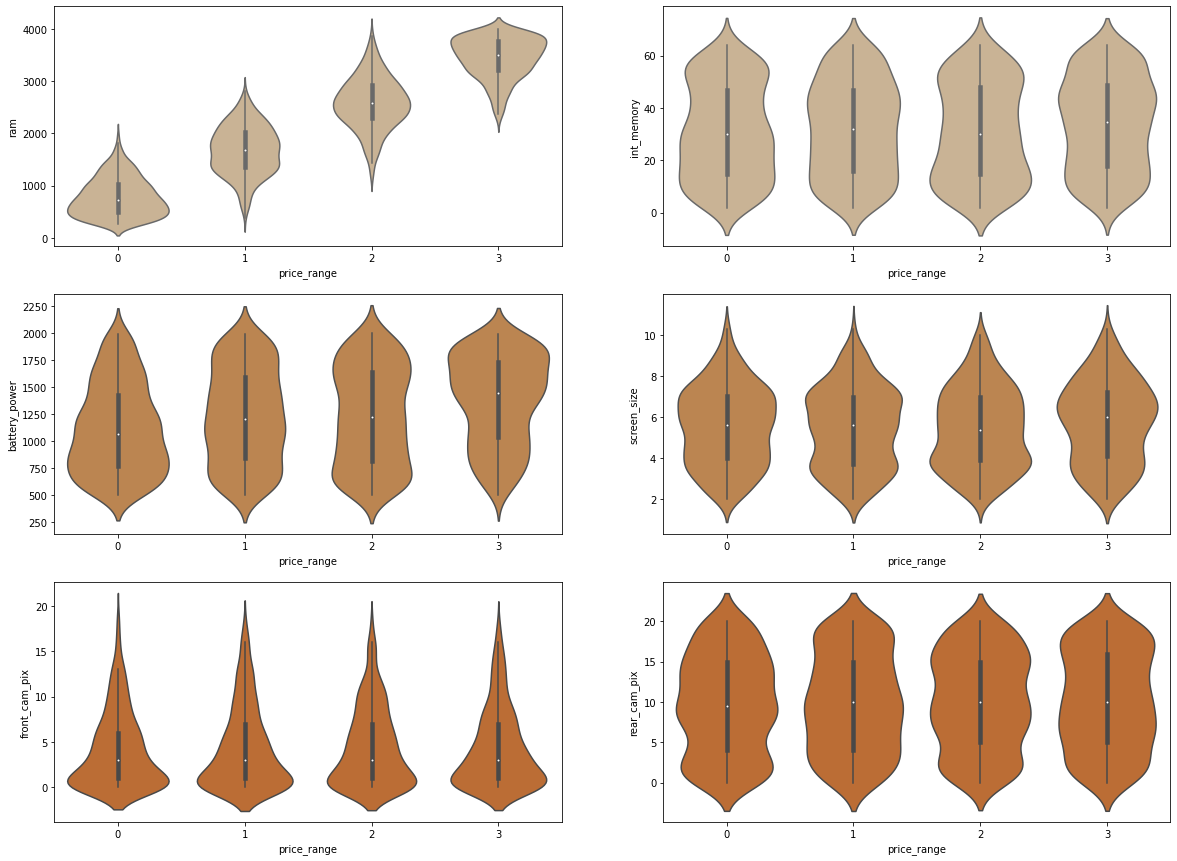

In [ ]:
plt.figure(figsize=(20,15))


plt.subplot(3,2,1)
sns.violinplot(x = 'price_range', y = 'ram', data = df, color="tan")
plt.subplot(3,2,2)
sns.violinplot(x = 'price_range', y = 'int_memory', data = df,color="tan")
plt.subplot(3,2,3)
sns.violinplot(x = 'price_range', y = 'battery_power', data = df, color="peru")
plt.subplot(3,2,4)
sns.violinplot(x = 'price_range', y = 'screen_size', data = df, color="peru")
plt.subplot(3,2,5)
sns.violinplot(x = 'price_range', y = 'front_cam_pix', data = df, color="chocolate")
plt.subplot(3,2,6)
sns.violinplot(x = 'price_range', y = 'rear_cam_pix', data = df, color="chocolate")

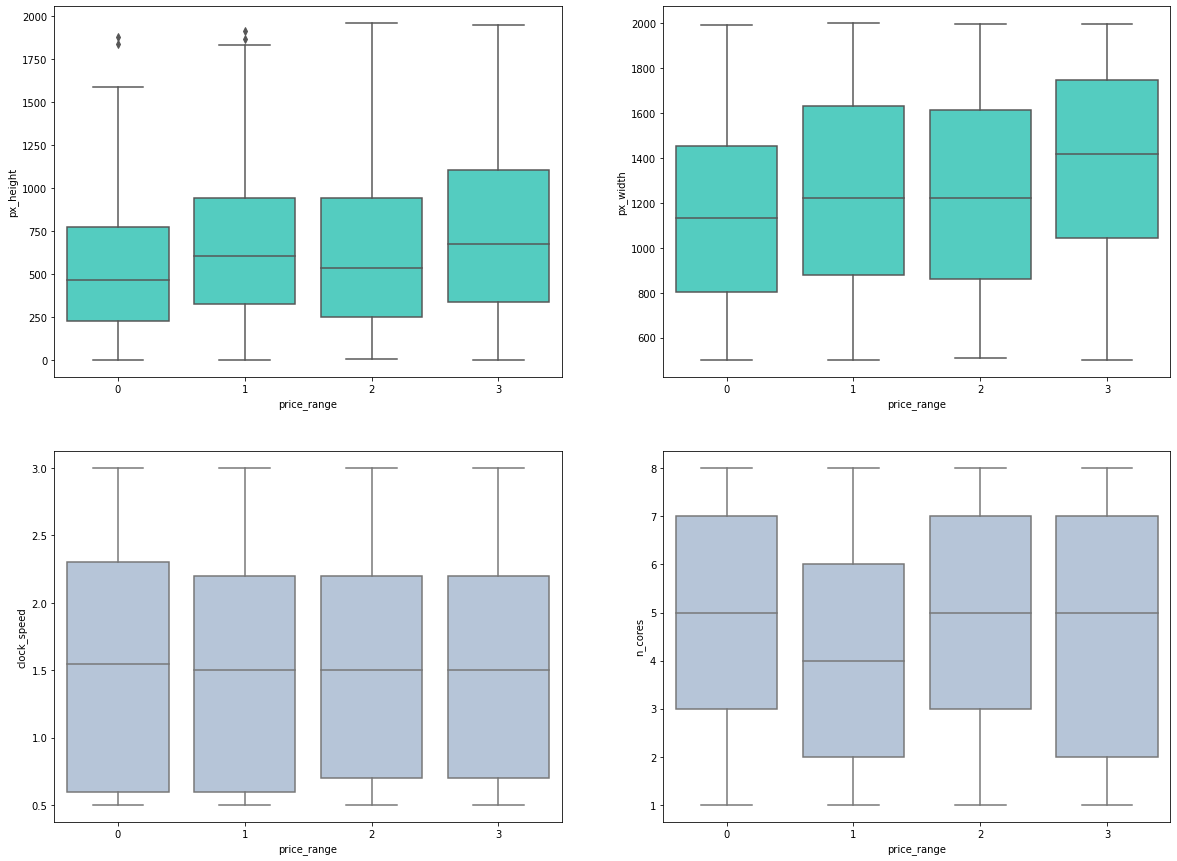

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x = 'price_range', y = 'px_height', data = df, color="turquoise")
plt.subplot(2,2,2)
sns.boxplot(x = 'price_range', y = 'px_width', data = df, color="turquoise")
plt.subplot(2,2,3)
sns.boxplot(x = 'price_range', y = 'clock_speed', data = df, color="lightsteelblue")
plt.subplot(2,2,4)
sns.boxplot(x = 'price_range', y = 'n_cores', data = df, color="lightsteelblue")

In [ ]:
print(binary_features)               

['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'has_front_cam', 'has_rear_cam', 'hd_quality', 'slim_and_light_weight_touch_mob']


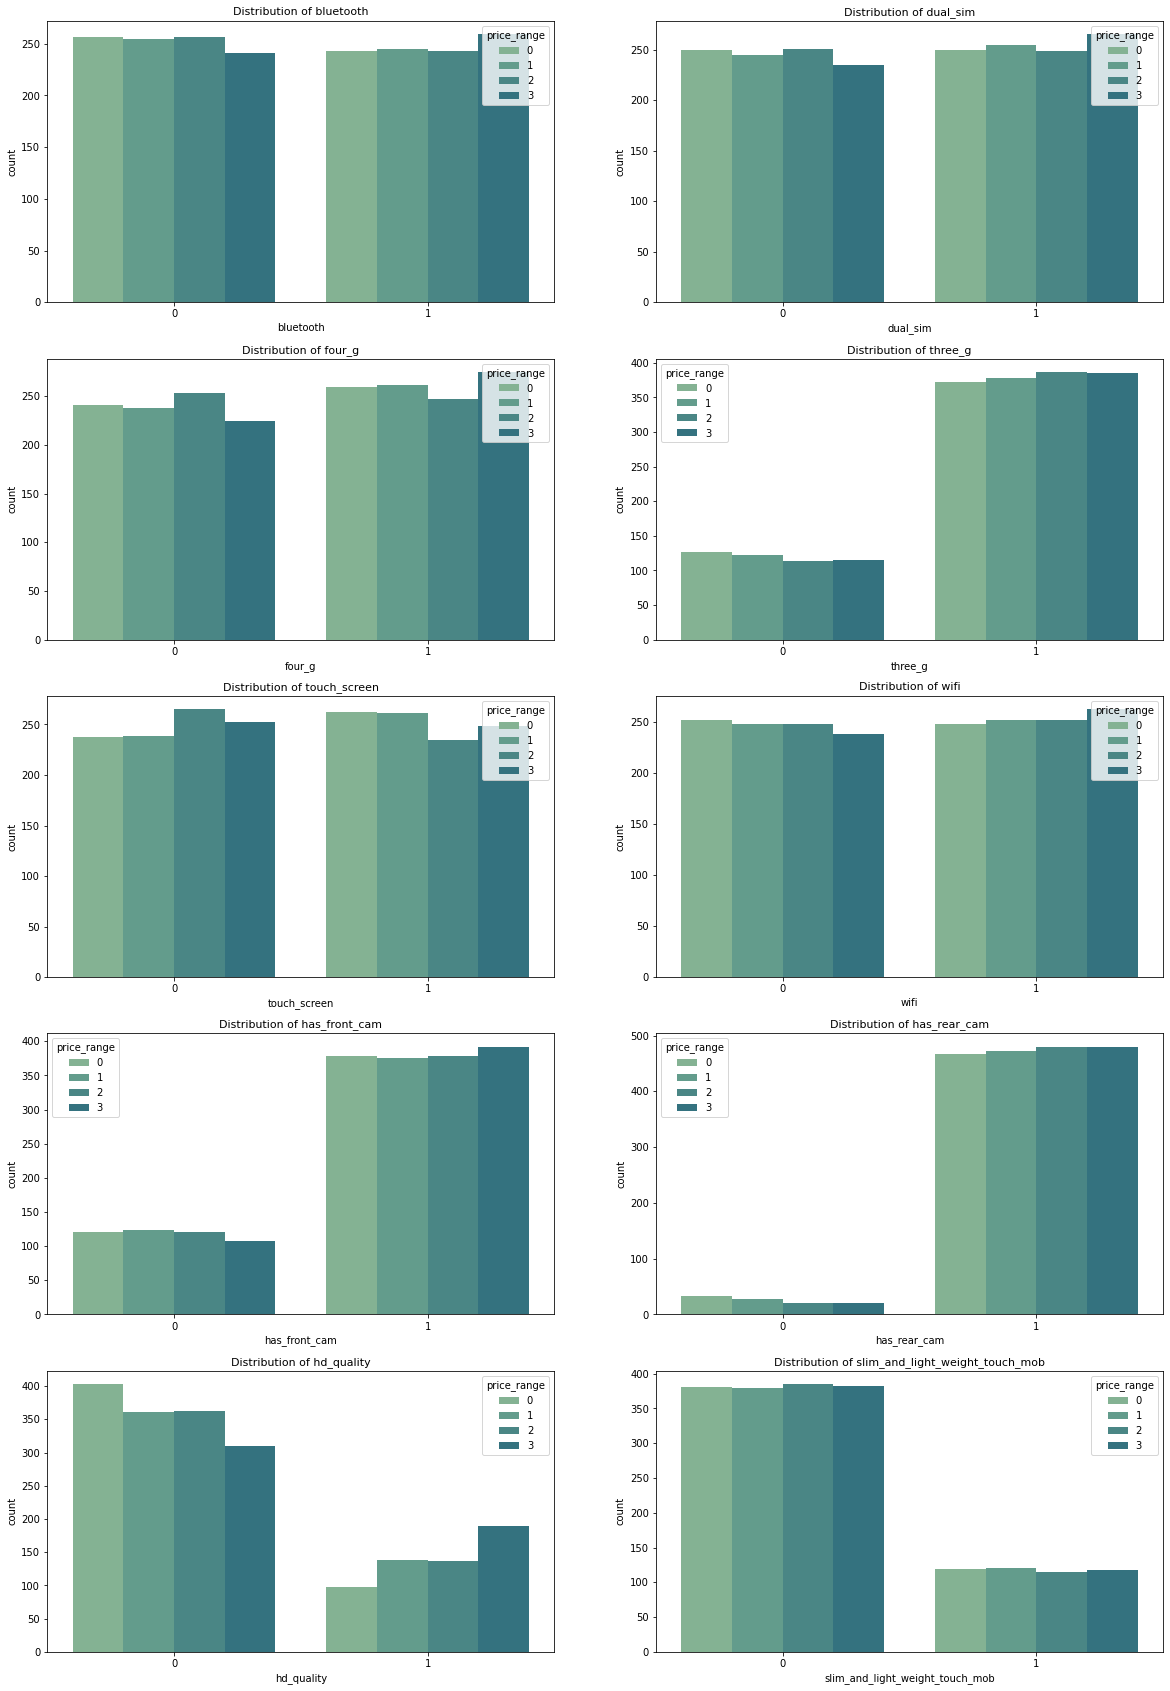

In [ ]:
plt.figure(figsize=(20,30))
i = 0
for feature in binary_features:
  plt.subplot(5,2,i+1)
  sns.countplot(df[feature], hue = df['price_range'])

  plt.title(f'Distribution of {binary_features[i]}', color = 'black',fontsize = 11)
  i += 1

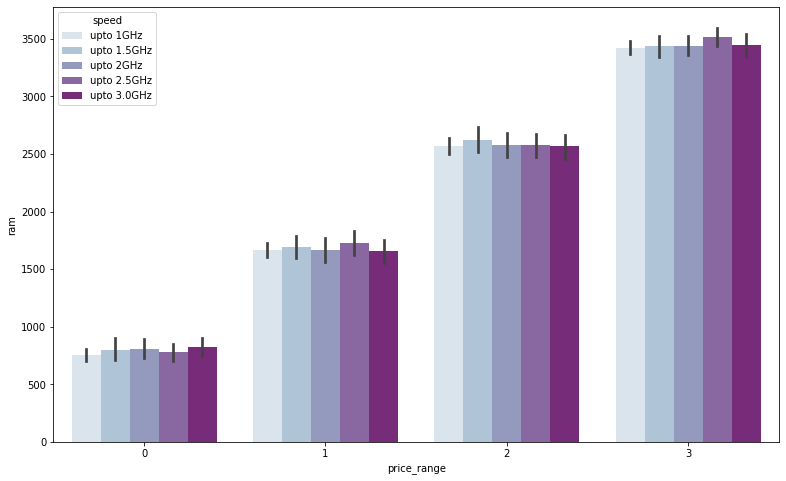

In [ ]:
plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['ram'], hue= df['speed'], palette = 'BuPu')

In [ ]:
g = sns.pairplot(df,vars=['ram',"battery_power","int_memory","px_height","px_width"],hue="price_range",size=3.7)
g.map_lower(sns.kdeplot, levels=2,color=".2")

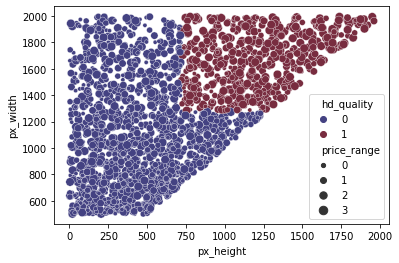

In [ ]:
sns.scatterplot(df["px_height"],df["px_width"],hue=df["hd_quality"],size=df["price_range"],palette = 'icefire')

In [ ]:
plt.figure(figsize = (10, 7))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'rocket_r')

In [ ]:
#clock speed and ram

plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['ram'], hue = df['speed'], palette = 'rocket_r')

In [ ]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['slim_and_light_weight_touch_mob'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'BuPu')

In [ ]:
plt.figure(figsize = (15, 5))

sns.barplot(df['hd_quality'], y = df['ram'], hue = df['price_range'], palette = 'BuPu')

In [ ]:
df.head()

In [ ]:
# selecting columns for model implementation
df_pre = df.copy()

In [ ]:
type(df_pre)

In [ ]:
df_pre = df_pre.drop(["px_height","px_width","screen_height","screen_width","ram_size","speed"],axis=1)

In [ ]:
# plotting Heatmap after creating dummies and removing most correlated features
plt.figure(figsize=(15,8))
correlation = df_pre.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
feature_selection = calc_vif(df_pre[[i for i in df_pre.describe().columns if i not in ['price_range',"mobile_wt","has_rear_cam","screen_size"]]])
feature_selection

In [ ]:
feature_selected_columns = feature_selection["variables"].value_counts().index

In [ ]:
X= df_pre[feature_selected_columns]
y = df_pre["price_range"]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

We've chosen multi_class as multinomial which is unlike OneVsRest but learns a true multinomial logistic regression which gives a better probability estimates, solvers was chosen to be newton-cg which is robust to unscaled dataset and only uses l2 regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
penalty=["l1","l2"]
max_iter= [80,100,140]
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
param_grid = dict(max_iter= max_iter,C=c_values, penalty=penalty)
log_reg = LogisticRegression(multi_class='multinomial', solver="newton-cg")
grid = GridSearchCV(estimator= log_reg, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train,y_train)

In [112]:
print(grid_result.best_score_)
print(grid_result.best_estimator_)
print(grid_result.best_params_)

0.8899999999999999
LogisticRegression(max_iter=140, multi_class='multinomial', solver='newton-cg')
{'C': 1.0, 'max_iter': 140, 'penalty': 'l2'}


In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver="newton-cg",C=1.0 ,max_iter= 140, penalty= "l2")
log_reg = log_reg.fit(X_train,y_train)
log_reg.coef_

In [ ]:
y_pred_test_lr = log_reg.predict(X_test)
y_pred_train_lr = log_reg.predict(X_train)

In [ ]:
y_pred_prob_test_lr = log_reg.predict_proba(X_test)
y_pred_prob_train_lr = log_reg.predict_proba(X_train)

In [ ]:
roc_auc_score(y_test, y_pred_prob_test_lr,multi_class="ovr",average='weighted')

In [ ]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_test_lr, y_test)
print(accur)

In [ ]:
y_pred_test_lr[:10]

In [ ]:
y_test[:10]

In [ ]:
log_reg.intercept_

In [96]:
# Calculating classification metrics on train and test data

#Test Data
lr_test_accuracy = accuracy_score(y_test, y_pred_test_lr)
lr_test_recall = recall_score(y_test, y_pred_test_lr, average='macro')
lr_test_precision = precision_score(y_test, y_pred_test_lr, average='macro')
lr_test_f1_score = f1_score(y_test, y_pred_test_lr, average='macro')
lr_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_lr,multi_class='ovr')

#Train Data
lr_train_accuracy = accuracy_score(y_train, y_pred_train_lr)
lr_train_recall = recall_score(y_train, y_pred_train_lr, average='macro')
lr_train_precision = precision_score(y_train, y_pred_train_lr, average='macro')
lr_train_f1_score = f1_score(y_train, y_pred_train_lr, average='macro')
lr_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_lr, multi_class='ovr')

In [97]:
print("The accuracy on test dataset is", lr_test_accuracy)
print("The recall score on test dataset is", lr_test_recall)
print("The precision on test dataset is", lr_test_precision)
print("The F1 score on test dataset is", lr_test_f1_score)
print("The ROC AUC score on test dataset is", lr_test_roc_auc)

The accuracy on test dataset is 0.875
The recall score on test dataset is 0.8738384994105819
The precision on test dataset is 0.8742568343106228
The F1 score on test dataset is 0.8739624386978182
The ROC AUC score on test dataset is 0.9823979432085597


In [98]:
print("The accuracy on train dataset is", lr_train_accuracy)
print("The recall score on train dataset is", lr_train_recall)
print("The precision on train dataset is", lr_train_precision)
print("The F1 score on train dataset is", lr_train_f1_score)
print("The ROC AUC on train dataset is", lr_train_roc_auc)

The accuracy on train dataset is 0.9
The recall score on train dataset is 0.9002154537774414
The precision on train dataset is 0.8999076603157371
The F1 score on train dataset is 0.900048883665388
The ROC AUC on train dataset is 0.989057226677532


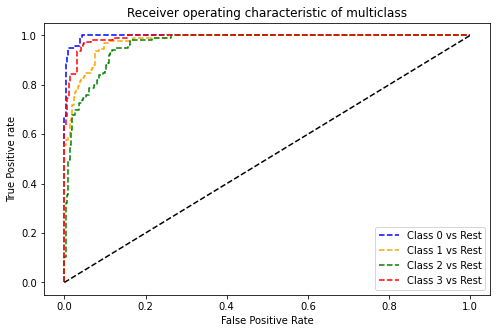

In [100]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_lr[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= "Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= "Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= "Class 2 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= "Class 3 vs Rest")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [101]:
from sklearn.metrics import multilabel_confusion_matrix

In [116]:
ml_cm = multilabel_confusion_matrix(y_test, y_pred_test_lr)
print(ml_cm)

[[[302   3]
  [  5  90]]

 [[291  17]
  [ 14  78]]

 [[280  21]
  [ 21  78]]

 [[277   9]
  [ 10 104]]]


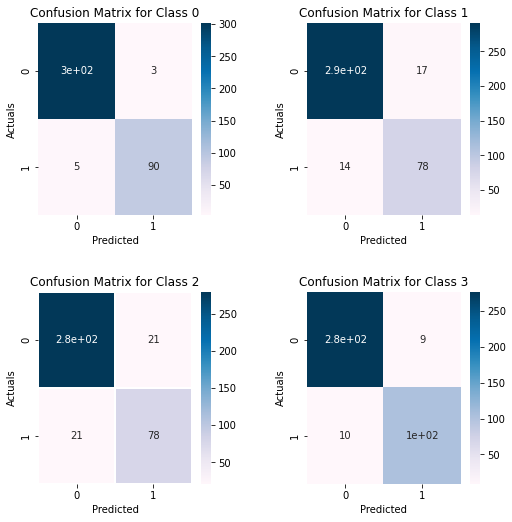

In [134]:
plt.figure(figsize=(8,8))

ax= plt.subplot(2,2,1)
sns.heatmap(ml_cm[0], annot=True, ax = ax, cmap= "PuBu")
plt.title("Confusion Matrix for Class 0")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

ax= plt.subplot(2,2,2)
sns.heatmap(ml_cm[1], annot=True, ax = ax, cmap= "PuBu")
plt.title("Confusion Matrix for Class 1")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

ax= plt.subplot(2,2,3)
sns.heatmap(ml_cm[2], annot=True, ax = ax, cmap= "PuBu", linewidths=1)
plt.title("Confusion Matrix for Class 2")
plt.xlabel("Predicted")
plt.ylabel("Actuals")

ax= plt.subplot(2,2,4)
sns.heatmap(ml_cm[3], annot=True, ax = ax, cmap= "PuBu")
plt.title("Confusion Matrix for Class 3")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)

In [111]:
confusion_matrix(y_train, y_pred_train_lr)

array([[385,  20,   0,   0],
       [ 23, 357,  28,   0],
       [  0,  28, 341,  32],
       [  0,   0,  29, 357]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

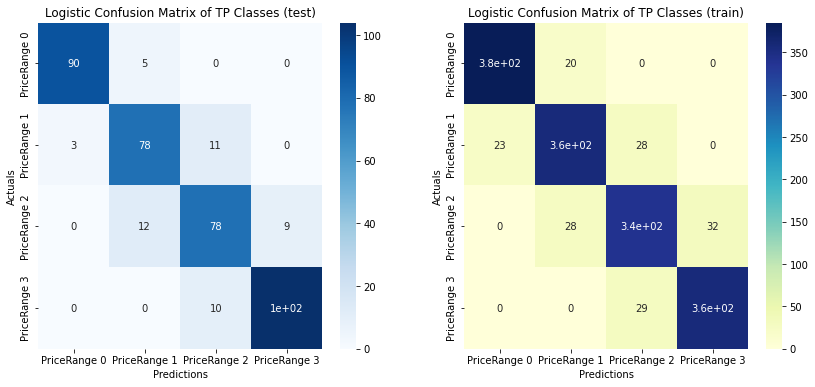

In [114]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm = confusion_matrix(y_test, y_pred_test_lr)
cm1 = confusion_matrix(y_train, y_pred_train_lr)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, ax = ax, cmap= "Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Logistic Confusion Matrix of TP Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm1, annot=True, ax = ax, cmap= "YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Logistic Confusion Matrix of TP Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib import figure
log_odds = np.log(y_pred_prob_test_lr / (1 - y_pred_prob_test_lr))

plt.figure(figsize = (15, 10))
for i in range(0,4):
  plt.subplot(2,2,i+1)
  plt.scatter(x=X_test['ram'].values, y=log_odds[:,i])
  plt.xlabel("Ram")
  plt.ylabel(f"Log-odds for class {i}")


One of the assumptions of logistic regression is that the relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear.

From the EDA part we can clearly say ram is one of the continuous variable which is directly dependent to price prediction, so we're picking one variable and checking our assumption, plotting log of odds for different classes vs ram variable, we can interpret that class 1 and 2 are more likely to be non linear, whereas class 0 and 3 have almost linear relationship with ram.

We can clearly see and vistualize that class 0 and 3 have more true positives than class 1 and 2 from our confusion matrix, they also have linear relationship btw log-odds and ram. unlike calss 1 and 2 which has low true positives and clearly violating logistic regression assumption 



In [ ]:
log_odds

In [ ]:
len(log_odds[:,1])

In [ ]:
y_pred_train_lr

In [ ]:
y_pred_prob_test_lr

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

In [ ]:
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

In [ ]:
#Predicting the test set result  
y_pred_prob_train_knn = knn.predict_proba(X_train)
y_pred_prob_test_knn = knn.predict_proba(X_test)  

In [ ]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)  

In [ ]:
y_test[:10]

In [ ]:
y_pred_test_knn[:10]

In [ ]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_knn[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= f"Class 0 (area= {roc_auc[0]})")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= f"Class 1 (area= {roc_auc[2]})")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= f"Class 2 (area= {roc_auc[2]})")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= f"Class 3 (area= {roc_auc[3]})")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [135]:
from sklearn import svm
svm_clf = svm.SVC()

In [140]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.0001],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svm_cv = GridSearchCV(svm_clf, param_grid,n_jobs=2, cv=5, verbose = 10,scoring='accuracy')              

In [141]:
svm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy', verbose=10)

In [144]:
print(svm_cv.best_params_)
print(svm_cv.best_score_)
# {'C': 1, 'kernel': 'linear'}
0.88375

{'C': 1, 'kernel': 'linear'}
0.88375
